# Very simple radar map

Learn at https://zhuanlan.zhihu.com/p/37104717

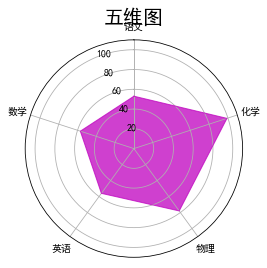

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

name = ['语文','数学','英语','物理','化学']   #标签
theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分
value = np.random.randint(50,100,size=5)   #在60-120内，随机取5个数
theta = np.concatenate((theta,[theta[0]]))  #闭合
value = np.concatenate((value,[value[0]]))  #闭合

ax = plt.subplot(111,projection = 'polar')      #构建图例
ax.plot(theta,value,'m-',lw=1,alpha = 0.75)    #绘图
ax.fill(theta,value,'m',alpha = 0.75)           #填充
ax.set_thetagrids(theta*180/np.pi,name)         #替换标签
ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
ax.set_title('五维图',fontsize = 20)   #添加图描述
plt.show()

# Advanced radar map

Learn at http://sofasofa.io/tutorials/radar_plot/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [5]:
data = pd.read_csv('cities_ranking.csv')
data.head()

,排名,城市,总分,经济产值,财富储蓄,环境,科教,文化,卫生
0,1,北京,93.74,86.98,100.00,95.88,100.00,98.05,82.62
1,2,上海,88.23,88.96,90.81,76.25,90.25,100.00,75.72
2,3,广州,83.40,83.73,81.67,78.86,97.46,88.96,72.84
3,4,深圳,75.10,86.63,73.22,84.76,43.97,94.77,45.73
4,5,杭州,73.42,68.23,69.47,79.27,79.50,89.47,74.98


In [6]:
def plot_radar(data, city):
    '''
    data是上面读入的原始数据
    city是要显示的城市，可以是一个城市，比如city="上海"
    也可以是一组城市，比如city=["杭州", "南京"]
    为了视觉效果，最多同时展示5个城市。
    '''
    if type(city) != list: city = [city]

    # 从下面六项指标，体现城市发展水平
    cols = ['文化', '科教', '经济产值', '财富储蓄', '环境', '卫生']

    # 每个城市的配色
    colors = ['green', 'blue', 'red', 'yellow', 'black']

    # 把圆形进行六等分
    angles = np.linspace(0.1 * np.pi, 2.1 * np.pi, len(cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    # 初始化一个极坐标图像
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)

    # 逐一添加每个城市图像以及排名信息
    for i, c in enumerate(city):
        rank = data.loc[data['城市'] == c, '排名'].values[0]
        stats = data.loc[data['城市'] == c, cols].values[0].tolist()
        stats = np.concatenate((stats, [stats[0]]))
        ax.plot(angles, stats, '-', linewidth=6, c=colors[i], label='%s 排名第%s'%(c, rank))
        ax.fill(angles, stats, c=colors[i], alpha=0.25)

    # 添加图例
    ax.legend(loc=[0.25, 1.15], fontsize=18)
    ax.set_yticklabels([])
    ax.set_thetagrids(angles * 180/np.pi, cols, fontsize=16)
    ax.grid(True)

    # 完成
    plt.show()
    return fig

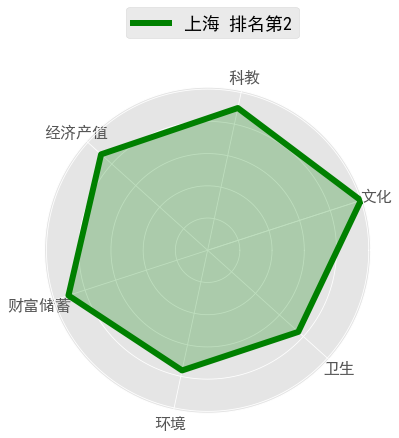

In [7]:
plot_radar(data, "上海");

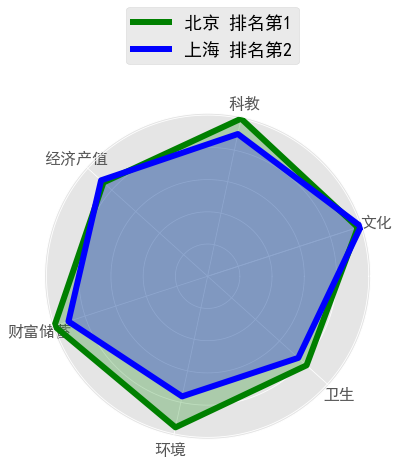

In [8]:
#城市对比
plot_radar(data, ['北京', '上海']);